In [32]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the figure suptitle
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [33]:
import numpy as np
import matplotlib.pyplot as plt

class NoisyLIFNeuron:
    def __init__(self, tau, R, threshold, sigma,we=0.1,wi=0.1, dt=0.01):
        self.tau = tau  # Membrane time constant
        self.R = R      # Membrane resistance
        self.threshold = threshold  # Firing threshold
        self.sigma = sigma #Amplitude of the noise (in units of voltage)
        self.dt = dt    # Time step
        self.we = we
        self.wi = wi
        self.reset()

    def reset(self):
        self.voltage = 0.0  # Initial membrane potential

    def update(self, I, exc, inh):
        # Membrane potential update using Euler method
        dv = (-(self.voltage) + self.R * I) / self.tau * self.dt + self.sigma*np.sqrt(self.dt)*np.random.normal(0, 1)
        self.voltage += dv
        if exc:
            self.voltage += self.we
        if inh:
            self.voltage -= self.wi
        # Check for spike
        if self.voltage >= self.threshold:
            self.voltage = 0.0  # Reset membrane potential after spike
            return True
        else:
            return False

def simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e,spikes_bg_i, we, wi, dt=0.01, duration=10):
    neuron = NoisyLIFNeuron(tau, R, threshold, sigma,we,wi, dt)
    time = np.arange(0, duration, dt)
    spikes = []
    voltages = []
    for t in time:
        exc = False
        inh = False
        if t in spikes_bg_e:
            exc = True
        if t in spikes_bg_i:
            inh = True
        spike = neuron.update(I, exc, inh)
        voltages.append(neuron.voltage)
        if spike:
            spikes.append(t)
    return spikes, voltages


def background(dt, t, N_background, lambda_, tau, seed):
    np.random.seed(seed)  # Set seed for reproducibility
    bg = 0
    spikes_bg = []
    for j in range(N_background):
        # Generate Poisson process
        events = np.random.poisson(lambda_ * dt, len(t))
        events[events > 1] = 1  # Ensure at most one event per timestep

        #obtain spike times
        spikes_temp = events*t
        spike_times = spikes_temp[spikes_temp != 0]
        spikes_bg = np.concatenate((spikes_bg,spike_times))
    return spikes_bg



# Subthreshold 

In [34]:
# Simulation parameters
tau = 10 # Membrane time constant (ms)
R = 1    # Membrane resistance
threshold = 1 # Firing threshold
sigma = 0  #NO STOCHASTIC NOISE
dt = 0.01 # Time step (ms)
duration = 20000  # Duration of simulation (ms)
t=np.arange(0, duration, dt)

I = 0.8  # Input current (arbitrary units)

lambda_hz_e = 16  # Rate of the Poisson process (in Hz) (of each single background neuron)
lambda_e = lambda_hz_e/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_e = 100
w_e = 0.05 #synaptic weight

lambda_hz_i = 16 # Rate of the Poisson process (in Hz)
lambda_i = lambda_hz_i/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_i = 100
w_i = 0.05 #synaptic weight

spikes_bg_e = background(dt,t,N_bg_e, lambda_e, tau, seed = 123)
spikes_bg_i = background(dt,t,N_bg_i, lambda_i, tau, seed = 321)



spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e, spikes_bg_i, w_e, w_i, dt, duration)
u =  voltages

11.846105512744515


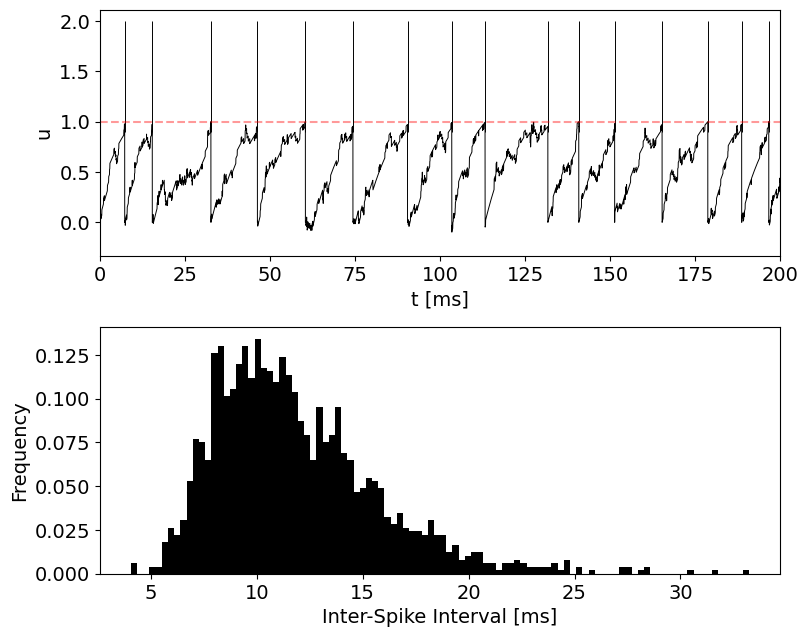

In [ ]:
plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
plt.plot(t, u, color = 'black', linewidth = 0.7)
plt.vlines(spikes, ymin=0.9, ymax=2, colors= 'black', linestyles='-', linewidth = 0.7)
plt.axhline(y=threshold, color='red', linestyle='--', alpha=0.4)

#plt.title('Membrane Potential')
plt.xlabel('t [ms]')
plt.ylabel('u')
plt.xlim(0,200)
# Adjust layout
plt.tight_layout()



isi = np.diff(spikes)

print(np.mean(isi))
plt.subplot(2,1,2)

# Plot ISI histogram
plt.hist(isi, bins=100, density=True, color = 'black')
plt.xlabel('Inter-Spike Interval [ms]')
plt.ylabel('Frequency')
#plt.title('Inter-Spike Interval Histogram')
plt.savefig('subthreshold_noise.png')
plt.show()

# Superthreshold

In [ ]:
# Simulation parameters
tau = 10 # Membrane time constant (ms)
R = 1    # Membrane resistance
threshold = 1 # Firing threshold
sigma = 0  #NO STOCHASTIC NOISE
dt = 0.01 # Time step (ms)
duration = 20000  # Duration of simulation (ms)
t=np.arange(0, duration, dt)

I = 1.4  # Input current (arbitrary units)

lambda_hz_e = 16  # Rate of the Poisson process (in Hz) (of each single background neuron)
lambda_e = lambda_hz_e/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_e = 100
w_e = 0.05 #synaptic weight

lambda_hz_i = 16 # Rate of the Poisson process (in Hz)
lambda_i = lambda_hz_i/1e3  # Rate of the Poisson process (events per unit time (spikes/ms))
N_bg_i = 100
w_i = 0.05 #synaptic weight

spikes_bg_e = background(dt,t,N_bg_e, lambda_e, tau, seed = 123)
spikes_bg_i = background(dt,t,N_bg_i, lambda_i, tau, seed = 321)



spikes, voltages = simulate_neuron(I, tau, R, threshold, sigma, spikes_bg_e, spikes_bg_i, w_e, w_i, dt, duration)
u =  voltages

11.846105512744515


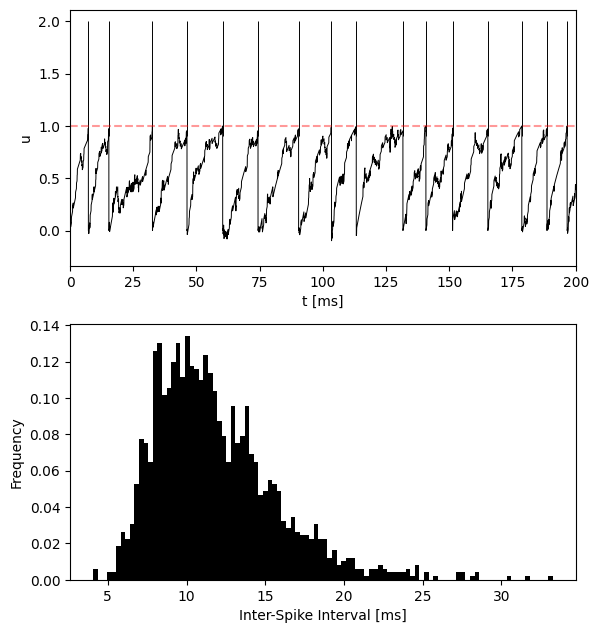

In [ ]:
plt.figure(figsize=(7,6))
plt.subplot(2,1,1)
plt.plot(t, u, color = 'black', linewidth = 0.7)
plt.vlines(spikes, ymin=0.9, ymax=2, colors= 'black', linestyles='-', linewidth = 0.7)
plt.axhline(y=threshold, color='red', linestyle='--', alpha=0.4)

#plt.title('Membrane Potential')
plt.xlabel('t [ms]')
plt.ylabel('u')
plt.xlim(0,200)
# Adjust layout
plt.tight_layout()



isi = np.diff(spikes)

print(np.mean(isi))
plt.subplot(2,1,2)

# Plot ISI histogram
plt.hist(isi, bins=100, density=True, color = 'black')
plt.xlabel('Inter-Spike Interval [ms]')
plt.ylabel('Frequency')
#plt.title('Inter-Spike Interval Histogram')
plt.savefig('superthreshold_noise.png')
plt.show()